In [1]:
%pip install -q -U pip
%pip install -q -U networkx
%pip install -q -U matplotlib
%pip install -q -U numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import collections
import numpy as np 

In [3]:
#import data from file
path = "../data/loc-brightkite_edges.txt.gz"
G = nx.read_edgelist(path, create_using=nx.Graph(), nodetype=int)
len(G.nodes()), len(G.edges())

(58228, 214078)

In [4]:
import pickle
def load(file):
    try:
        with open(f"../data/{file}", 'rb') as f:
            return pickle.load(f)
    except FileNotFoundError:
        raise FileNotFoundError(f"File not found, please run the code first and save it using save(\"{file}\", data)")
def save(file, data):
    with open(f"../data/{file}", 'wb') as f:
        pickle.dump(data, f)

# Get largest component

In [5]:
largest_cc = max(nx.connected_components(G), key=len)
len(largest_cc)
G = G.subgraph(largest_cc)

In [8]:

print("Number of edges:", len(nx.edges(G)))
print("Number of nodes", len(nx.nodes(G)))
print("The average clustering coefficient for the network:", nx.average_clustering(G))
#print("The clustering coefficient for nodes", nx.clustering(G))
print("The maximum degree of the network:", max(dict(G.degree()).values()))

Number of edges: 212945
Number of nodes 56739
The average clustering coefficient for the network: 0.17337881358774052
The maximum degree of the network: 1134


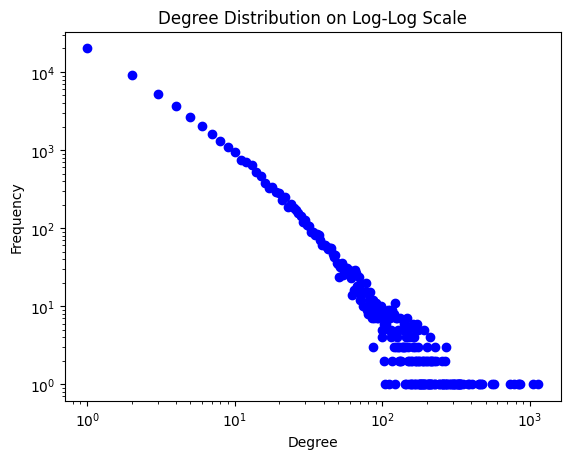

In [9]:
# Calculate the degrees of all nodes and store them in a list
degrees = [degree for node, degree in G.degree()]

# Count the frequency of each degree value
degree_count = Counter(degrees)
degree, frequency = zip(*degree_count.items())

# Create a scatter plot of degrees (log-log scale)
plt.scatter(degree, frequency, c='blue')

# Set the x and y axis to log scale
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution on Log-Log Scale')

# Show the plot
plt.show()

Power law


In [10]:
%pip install -q -U powerlaw

Note: you may need to restart the kernel to use updated packages.


Calculating best minimal value for power law fit


<Axes: >

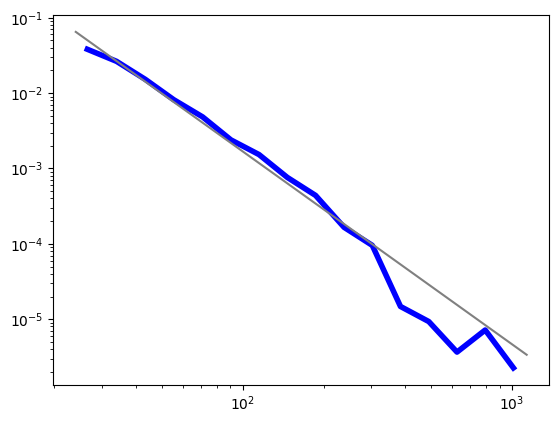

In [11]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α
fit = powerlaw.Fit(degree_sequence) 
fig2 = fit.plot_pdf(color='b', linewidth=4)
fit.power_law.plot_pdf(color = "grey", ax=fig2)

CCDF log log scale


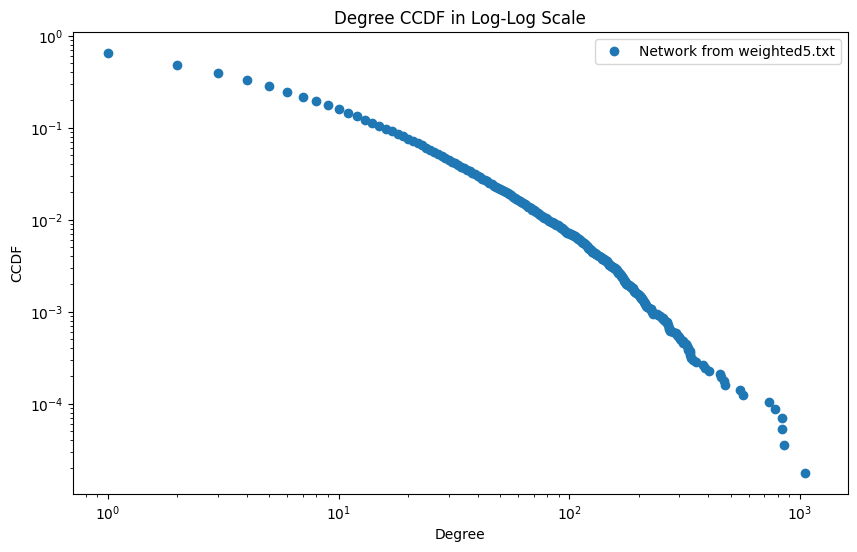

In [12]:
# finding the degree CCDF 
def degree_ccdf(graph):
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
    degree_count = collections.Counter(degree_sequence)
    degree, count = zip(*degree_count.items())
    ccdf = 1 - np.cumsum(count[::-1])[::-1]/graph.number_of_nodes()
    return degree, ccdf

# plotting the ccdf for the true graph and the random graph 
degree_G, ccdf_G  = degree_ccdf(G)
plt.figure(figsize=(10, 6))
plt.loglog(degree_G, ccdf_G, marker='o', linestyle='None', label='Network from weighted5.txt')
plt.title('Degree CCDF in Log-Log Scale')
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.legend()
plt.show()

Density

In [13]:
density = nx.density(G)
density

0.00013229448579703528

Local clustering coefficient

In [14]:
try:
    clusters = load("clusters.pkl")
except:
    clusters = nx.clustering(G)
    save("clusters.pkl", clusters)
clusters

{0: 0.0938375350140056,
 1: 0.3282051282051282,
 2: 0.09903026741110785,
 3: 0.028074586214121098,
 4: 0.4301994301994302,
 5: 0.24514338575393155,
 6: 0.05191146881287726,
 7: 0.06102145433833302,
 8: 0.6666666666666666,
 9: 0.3439153439153439,
 10: 0.08235294117647059,
 11: 0.1358756016290263,
 12: 0.06637168141592921,
 13: 0.06997762863534676,
 14: 0.17142857142857143,
 15: 0.13048780487804879,
 16: 0.09206349206349207,
 17: 0.08436532507739938,
 18: 0.1540447504302926,
 19: 0.09619450317124736,
 20: 0.09102475133009484,
 21: 0.07890070921985816,
 22: 0.4642857142857143,
 23: 0.2206896551724138,
 24: 0.16009852216748768,
 25: 0.1282051282051282,
 26: 0.12468354430379747,
 27: 0.04247806937720671,
 28: 0.25757575757575757,
 29: 0.06231003039513678,
 30: 0.039307833556378576,
 31: 0.15384615384615385,
 32: 0.2222222222222222,
 33: 1.0,
 34: 0.10795454545454546,
 35: 0.030915991949343358,
 36: 0.010655675491946369,
 37: 0.10599217103282144,
 38: 0.3862433862433862,
 39: 0.5,
 40: 0.010

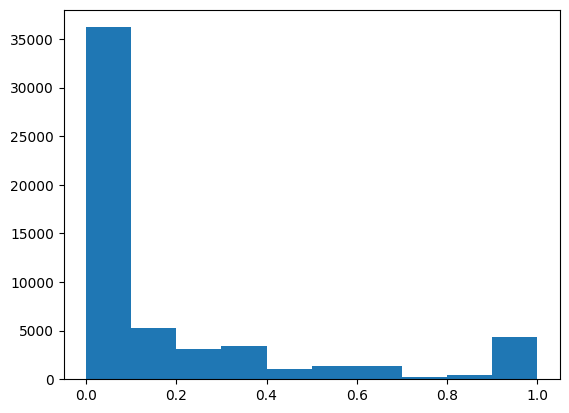

In [41]:
min(clusters.values()) , max(clusters.values())
# (0,1.0) 
plt.hist(clusters.values())
plt.show()
# most nodes have lower clustering coefficients but some also have very high clustering coefficient 

Diameter

In [42]:
try:
    diameter = load("diameter.pkl")
except:
    diameter = nx.diameter(G)
    save("diameter.pkl", diameter)
diameter

# answer = 18 

18

Average shortest path

In [6]:
try:
    avg_shortest_path = load("avg_shortest_path.pkl")
except:
    avg_shortest_path = nx.average_shortest_path_length(G)
    save("avg_shortest_path.pkl", avg_shortest_path)
avg_shortest_path

# answer: 4.917269741932054

4.917269741932054

Path length distribution

Betweeness centrality